In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os, subprocess

from coolpuppy import coolpup
from coolpuppy.lib import numutils
from coolpuppy.lib.puputils import divide_pups
from coolpuppy import plotpup
import cooler
import bioframe
import cooltools
from cooltools import expected_cis, expected_trans
from cooltools.lib import plotting

In [2]:
from matplotlib import font_manager

# 加载字体文件
font_path = "/mnt/disk1/6/lxk/private/DNase-C/dimer_paper/figS1/compartment/arial.ttf"  # 替换为你的字体文件路径
font_manager.fontManager.addfont(font_path)

# 设置字体
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = 14

In [3]:
resolution = 5000
# clr_1 = cooler.Cooler(f'../DNaseC_293T_total_UMI_wlink_nochrCLMT.mcool::/resolutions/{resolution}')
clr_1 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/293T/regular_file/DNaseC_293T_total_UMI_wlink_nochrCLMT.mcool::/resolutions/{resolution}')

In [4]:
hg38_chromsizes = bioframe.fetch_chromsizes('hg38')
hg38_cens = bioframe.fetch_centromeres('hg38')
hg38_arms = bioframe.make_chromarms(hg38_chromsizes, hg38_cens)
hg38_arms = hg38_arms.set_index("chrom").loc[clr_1.chromnames].reset_index()
hg38_arms = bioframe.make_viewframe(hg38_arms)

In [5]:
sites_1 = bioframe.read_table('/mnt/disk1/6/lxk/private/DNase-C/dimer_paper/figS3/S3C/R1/Hs_CTCF_gatc_down_signal_screen.bed', schema='bed')
sites_2 = bioframe.read_table('/mnt/disk1/6/lxk/private/DNase-C/dimer_paper/figS3/S3C/R1/Hs_CTCF_gatc_nosignal_signal_screen.bed', schema='bed')

In [6]:
# # Calculate expected interactions for chromosome arms
expected_1 = expected_cis(
    clr_1,
    ignore_diags=2,
    view_df=hg38_arms,
    chunksize=1000000, 
    nproc=80
)

In [7]:
flank=300_000

In [8]:
pup_1 = coolpup.pileup(clr_1, 
                       sites_1, 
                       features_format='bed', 
                       view_df=hg38_arms, 
                       local=True,
                       expected_df=expected_1,
                       flip_negative_strand=True, 
                       nshifts=20,
                       flank=flank, 
                       min_diag=2, 
                       nproc=80
                      )

/home/lxk/.local/lib/python3.8/site-packages/coolpuppy/coolpup.py:2174: UserWarning: Can't do both expected and control shifts; defaulting to expected
  PU = PileUpper(
INFO:coolpuppy:('chr12_p', 'chr12_p'): 59
INFO:coolpuppy:('chr10_p', 'chr10_p'): 67
INFO:coolpuppy:('chr18_p', 'chr18_p'): 20
INFO:coolpuppy:('chr16_p', 'chr16_p'): 80
INFO:coolpuppy:('chr11_p', 'chr11_p'): 88
INFO:coolpuppy:('chr17_p', 'chr17_p'): 57
INFO:coolpuppy:('chr19_p', 'chr19_p'): 106
INFO:coolpuppy:('chr19_q', 'chr19_q'): 111
INFO:coolpuppy:('chr22_p', 'chr22_p'): 1
INFO:coolpuppy:('chr16_q', 'chr16_q'): 110
INFO:coolpuppy:('chr20_p', 'chr20_p'): 45
INFO:coolpuppy:('chr17_q', 'chr17_q'): 188
INFO:coolpuppy:('chr11_q', 'chr11_q'): 175
INFO:coolpuppy:('chr20_q', 'chr20_q'): 120
INFO:coolpuppy:('chr15_q', 'chr15_q'): 140
INFO:coolpuppy:('chr21_q', 'chr21_q'): 48
INFO:coolpuppy:('chr22_q', 'chr22_q'): 116
INFO:coolpuppy:('chr18_q', 'chr18_q'): 72
INFO:coolpuppy:('chr12_q', 'chr12_q'): 221
INFO:coolpuppy:('chr10_q'

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


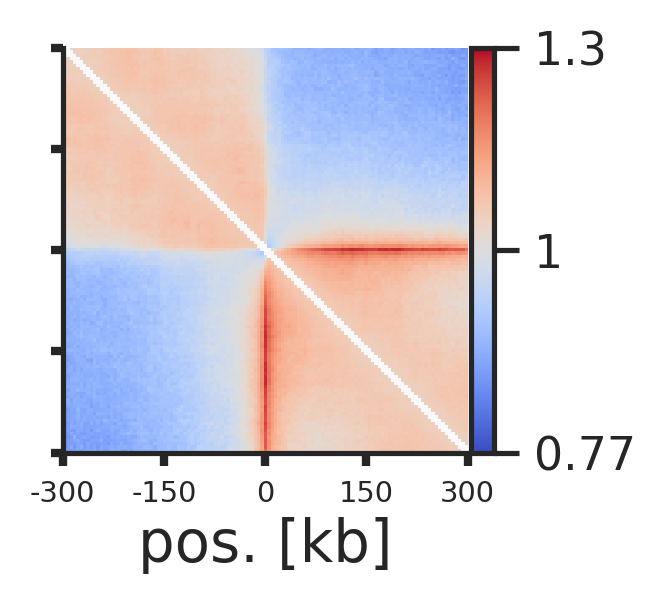

In [9]:
fig1 = plotpup.plot(pup_1,
             score=False, 
             cmap='coolwarm', 
#              scale='linear',
             sym=True, 
             vmax=1.3,
             vmin=0.77,
             height=2, 
             plot_ticks=True
            )
fig1.savefig('Hi_Dam.pdf')

In [10]:
pup_3 = coolpup.pileup(clr_1, 
                       sites_2, 
                       features_format='bed', 
                       view_df=hg38_arms, 
                       local=True,
                       expected_df=expected_1,
                       flip_negative_strand=True, 
                       nshifts=20,
                       flank=flank, 
                       min_diag=2, 
                       nproc=80
                      )

/home/lxk/.local/lib/python3.8/site-packages/coolpuppy/coolpup.py:2174: UserWarning: Can't do both expected and control shifts; defaulting to expected
  PU = PileUpper(
INFO:coolpuppy:('chr12_p', 'chr12_p'): 68
INFO:coolpuppy:('chr10_p', 'chr10_p'): 68
INFO:coolpuppy:('chr18_p', 'chr18_p'): 43
INFO:coolpuppy:('chr17_p', 'chr17_p'): 80
INFO:coolpuppy:('chr16_p', 'chr16_p'): 130
INFO:coolpuppy:('chr11_p', 'chr11_p'): 108
INFO:coolpuppy:('chr19_p', 'chr19_p'): 153
INFO:coolpuppy:('chr21_p', 'chr21_p'): 2
INFO:coolpuppy:('chr19_q', 'chr19_q'): 159
INFO:coolpuppy:('chr16_q', 'chr16_q'): 161
INFO:coolpuppy:('chr20_p', 'chr20_p'): 90
INFO:coolpuppy:('chr17_q', 'chr17_q'): 247
INFO:coolpuppy:('chr20_q', 'chr20_q'): 174
INFO:coolpuppy:('chr11_q', 'chr11_q'): 226
INFO:coolpuppy:('chr21_q', 'chr21_q'): 76
INFO:coolpuppy:('chr22_q', 'chr22_q'): 164
INFO:coolpuppy:('chr18_q', 'chr18_q'): 129
INFO:coolpuppy:('chr15_q', 'chr15_q'): 202
INFO:coolpuppy:('chr14_q', 'chr14_q'): 183
INFO:coolpuppy:('chr4_

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


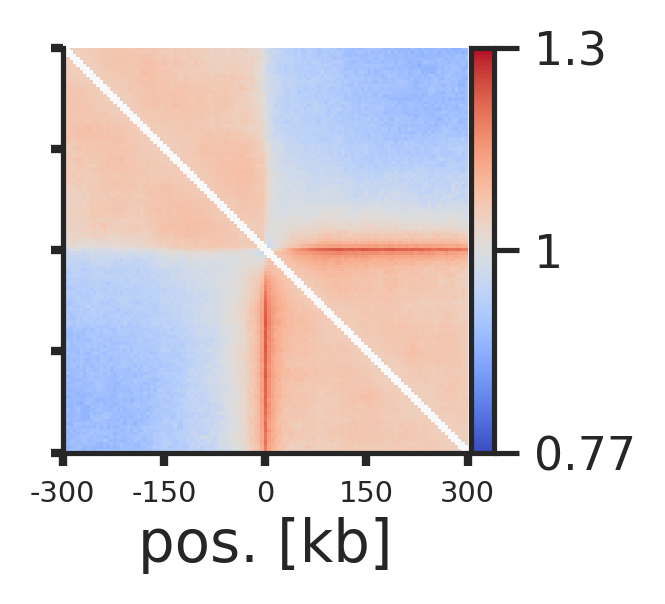

In [11]:
fig3 = plotpup.plot(pup_3,
             score=False, 
             cmap='coolwarm', 
#              scale='linear',
             sym=True, 
             vmax=1.3,
             vmin=0.77,
             height=2, 
             plot_ticks=True
            )
fig3.savefig('Lo_Dam.pdf')

INFO:coolpuppy:Can't use symmetrical scale with linear. Plotting non-symmetrical


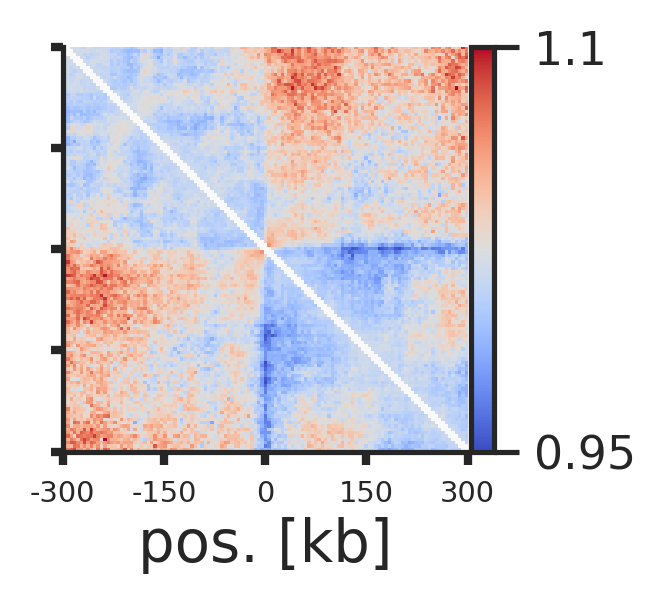

In [12]:
pup_divide = divide_pups(pup_3, pup_1)

fig_divide = plotpup.plot(pup_divide,
             score=False, 
             cmap='coolwarm', 
             scale='linear',
             sym=True, 
#              vmax=1.5,
#              vmin=0.67,
             height=2, 
             plot_ticks=True
            )

# fig.savefig('nosignal-down.pdf')

In [13]:
np.log2(1.3)

0.37851162325372983

In [14]:
np.log2(0.77)

-0.3770696490798233

In [15]:
n = int(flank/resolution)
n

60

In [16]:
data_list_1 = pup_1['data'].iloc[0]
matrix_1 = np.array(data_list_1)
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
# y1 = matrix_1[40][42:81]
y1 = matrix_1[n][n+2:2*n+1]
y1

array([0.99704494, 1.01773402, 1.04266582, 1.06825713, 1.0897703 , 1.10405263, 1.1274023 , 1.14004424, 1.15937425, 1.16887641, 1.18278177, 1.19165031, 1.20707448, 1.21209406, 1.2194026 , 1.23043383, 1.24142017, 1.24401376, 1.24058624, 1.25027492, 1.24922964, 1.26821539, 1.26200234, 1.27035292, 1.27668021, 1.26908098, 1.26647304, 1.26787984, 1.2600376 , 1.25472721, 1.25526554, 1.2522032 , 1.2756593 , 1.26729469, 1.27251406, 1.26235372, 1.27317896, 1.27486987, 1.27456784, 1.26475252, 1.25207169, 1.25226971, 1.24441944, 1.23849376, 1.23397017, 1.25168867, 1.24317378, 1.23524273, 1.23709136, 1.23729228, 1.24831484, 1.23566931, 1.23377583, 1.2214565 , 1.22224799, 1.22730542, 1.22082229, 1.22285236, 1.19441655])

In [17]:
np.nansum(matrix_1[40][42:81])

39.39067073504437

In [18]:
data_list_2 = pup_3['data'].iloc[0]
matrix_2 = np.array(data_list_2)
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
# y2 = matrix_2[40][42:81]
y2 = matrix_2[n][n+2:2*n+1]
y2

array([1.01331257, 1.02645719, 1.04476925, 1.06271447, 1.07788498, 1.09885747, 1.12435448, 1.13238888, 1.14460775, 1.16174769, 1.16328223, 1.18126937, 1.18961686, 1.19703725, 1.20563804, 1.20880392, 1.21144061, 1.21723711, 1.21832242, 1.22361214, 1.22800997, 1.21766472, 1.21168458, 1.22081944, 1.21541681, 1.21147742, 1.2189312 , 1.2254491 , 1.22388021, 1.21704278, 1.21885125, 1.21325259, 1.21027412, 1.20811679, 1.21772849, 1.21731938, 1.22484474, 1.2140563 , 1.20991478, 1.21101986, 1.20806974, 1.20661444, 1.21331203, 1.20365184, 1.20955164, 1.20551385, 1.19882193, 1.20431556, 1.1906499 , 1.19241897, 1.20386496, 1.19858988, 1.19789286, 1.18747167, 1.18874136, 1.18869326, 1.19572765, 1.17751862, 1.17644868])

In [19]:
np.nansum(matrix_2[40][42:81])

39.822490569102875

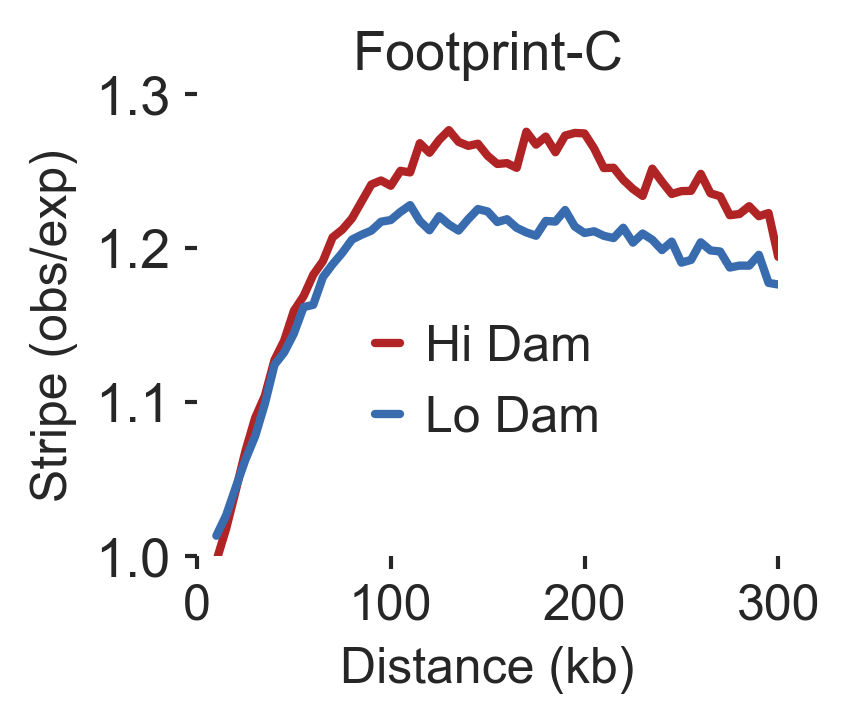

In [20]:
data_list_1 = pup_1['data'].iloc[0]
matrix_1 = np.array(data_list_1)
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
# y1 = matrix_1[40][42:81]
y1 = matrix_1[n][n+2:2*n+1]

data_list_2 = pup_3['data'].iloc[0]
matrix_2 = np.array(data_list_2)
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
# y2 = matrix_2[40][42:81]
y2 = matrix_2[n][n+2:2*n+1]

from matplotlib import font_manager

# 加载字体文件
font_path = "/mnt/disk1/6/lxk/private/DNase-C/dimer_paper/figS1/compartment/arial.ttf"  # 替换为你的字体文件路径
font_manager.fontManager.addfont(font_path)

# 设置字体
plt.rcParams["font.family"] = "Arial"
# plt.rcParams['font.size'] = 13
# 全局设置刻度参数
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['ytick.major.size'] = 3
# plt.rcParams['xtick.minor.size'] = 5
# plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['xtick.major.width'] = 1.0
plt.rcParams['ytick.major.width'] = 1.0

import matplotlib.pyplot as plt
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False

x = np.arange(2, n+1)*resolution

plt.figure(figsize=(2.5, 2.0))  # 设置图形大小
plt.plot(x, y1, label='Hi Dam', color='#b12425', linewidth=2)
plt.plot(x, y2, label='Lo Dam', color='#386CAF', linewidth=2)
# plt.plot([min(x), max(x)], [1, 1],  
#          color='black',           # 线条颜色
#          linewidth=1.5,           # 线条宽度
#          linestyle='--',         # 线条样式：'-' 实线, '--' 虚线, '-.' 点划线
# #          marker='o',            # 标记点样式
# #          markersize=6,          # 标记点大小
# #          label='Data Line'
#         )

# 设置 y 轴区间
plt.ylim(1, 1.3)  # 设置 y 轴从 0 到 2
# plt.ylim(0, 0.25)
plt.xlim(0, n*resolution)

xticks = np.arange(0, flank+1, 100000)


plt.xticks(xticks, xticks//1000, fontsize=12)
plt.yticks(fontsize=13)

plt.title('Footprint-C', fontsize=13)
plt.xlabel('Distance (kb)', fontsize=12)
plt.ylabel("Stripe (obs/exp)", fontsize=12)
plt.legend(fontsize=12, 
           frameon=False,
           bbox_to_anchor=(0.5, 0.6),  # (x, y) 相对坐标
           loc='upper center',           # 基准位置
           ncol=1,
           handlelength=0.5,    # 图例标记的长度（默认是 2）
           handletextpad=0.5,   # 图例标记和文本之间的间距
           columnspacing=2    # 多列时列之间的间距
          )

# 详细保存参数
plt.savefig(
    'stripe.pdf',          # 文件名
    dpi=300,                # 分辨率（DPI）
    bbox_inches='tight',    # 紧凑布局，去除多余空白
    facecolor='white',      # 背景色
    edgecolor='none',       # 边框色
    transparent=False,      # 是否透明背景
    format='pdf'            # 指定格式（可选）
)

plt.show()

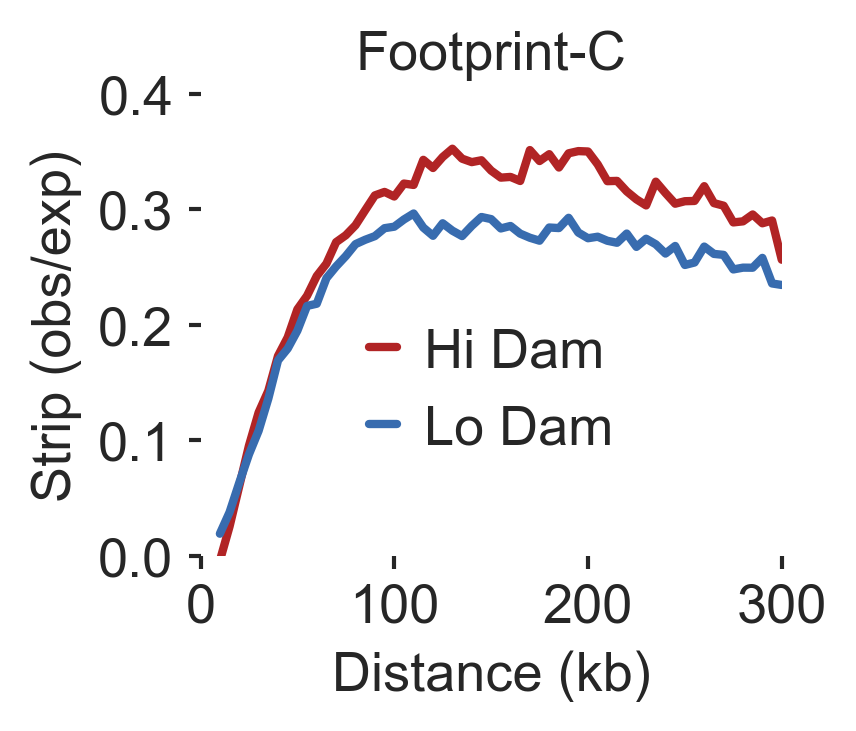

In [21]:
data_list_1 = pup_1['data'].iloc[0]
matrix_1 = np.array(data_list_1)
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
# y1 = matrix_1[40][42:81]
y1 = np.log2(matrix_1[n][n+2:2*n+1])

data_list_2 = pup_3['data'].iloc[0]
matrix_2 = np.array(data_list_2)
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
# y2 = matrix_2[40][42:81]
y2 = np.log2(matrix_2[n][n+2:2*n+1])

from matplotlib import font_manager

# 加载字体文件
font_path = "/mnt/disk1/6/lxk/private/DNase-C/dimer_paper/figS1/compartment/arial.ttf"  # 替换为你的字体文件路径
font_manager.fontManager.addfont(font_path)

# 设置字体
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = 15
# 全局设置刻度参数
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['ytick.major.size'] = 3
# plt.rcParams['xtick.minor.size'] = 5
# plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['xtick.major.width'] = 1.0
plt.rcParams['ytick.major.width'] = 1.0

import matplotlib.pyplot as plt

x = np.arange(2, n+1)*resolution

plt.figure(figsize=(2.5, 2.0))  # 设置图形大小
plt.plot(x, y1, label='Hi Dam', color='#b12425', linewidth=2)
plt.plot(x, y2, label='Lo Dam', color='#386CAF', linewidth=2)
plt.plot([min(x), max(x)], [1, 1],  
         color='black',           # 线条颜色
         linewidth=1.5,           # 线条宽度
         linestyle='--',         # 线条样式：'-' 实线, '--' 虚线, '-.' 点划线
#          marker='o',            # 标记点样式
#          markersize=6,          # 标记点大小
#          label='Data Line'
        )

# 设置 y 轴区间
# plt.ylim(0.9, 1.3)  # 设置 y 轴从 0 到 2
plt.ylim(0, 0.4)
plt.xlim(0, n*resolution)

xticks = np.arange(0, flank+1, 100000)


plt.xticks(xticks, xticks//1000, fontsize=13)
plt.yticks(fontsize=13)

plt.title('Footprint-C', fontsize=13)
plt.xlabel('Distance (kb)', fontsize=13)
plt.ylabel('Strip (obs/exp)', 
           fontsize=13) 

plt.legend(fontsize=13, 
           frameon=False,
           bbox_to_anchor=(0.5, 0.6),  # (x, y) 相对坐标
           loc='upper center',           # 基准位置
           ncol=1,
           handlelength=0.5,    # 图例标记的长度（默认是 2）
           handletextpad=0.5,   # 图例标记和文本之间的间距
           columnspacing=2    # 多列时列之间的间距
          )

# 详细保存参数
plt.savefig(
    'stripe_log.pdf',          # 文件名
    dpi=300,                # 分辨率（DPI）
    bbox_inches='tight',    # 紧凑布局，去除多余空白
    facecolor='white',      # 背景色
    edgecolor='none',       # 边框色
    transparent=False,      # 是否透明背景
    format='pdf'            # 指定格式（可选）
)

plt.show()

In [22]:
your_label = r'Strip enrichment\n$\log_2$(Obs/Exp)' # 假设这是你的变量
print(repr(your_label)) # 使用 repr 查看其“原始表示”

'Strip enrichment\\n$\\log_2$(Obs/Exp)'
